### Mark Hoogendoorn and Burkhardt Funk (2017)              
Machine Learning for the Quantified Self               
Springer
Chapter 5     

In [7]:
from util.VisualizeDataset import VisualizeDataset
from Chapter5.DistanceMetrics import InstanceDistanceMetrics
from Chapter5.DistanceMetrics import PersonDistanceMetricsNoOrdering
from Chapter5.DistanceMetrics import PersonDistanceMetricsOrdering
from Chapter5.Clustering import NonHierarchicalClustering
from Chapter5.Clustering import HierarchicalClustering
import copy
import pandas as pd
import matplotlib.pyplot as plot
import util.util as util

In [8]:
# Of course we repeat some stuff from Chapter 3, namely to load the dataset

DataViz = VisualizeDataset()

# Read the result from the previous chapter, and make sure the index is of the type datetime.
dataset_path = 'intermediate_datafiles/'

try:
    dataset = pd.read_csv(dataset_path + 'chapter4_result.csv', index_col=0)
except IOError as e:
    print('File not found, try to run previous crowdsignals scripts first!')
    raise e
dataset.index = dataset.index.to_datetime()

C:\Users\davee\Anaconda3\envs\ml4qs\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  del sys.path[0]


## kmeans clustering

In [9]:
# First let us use non hierarchical clustering.
clusteringNH = NonHierarchicalClustering()

===== kmeans clustering =====
k =  2
silhouette =  0.696736274589
k =  3
silhouette =  0.647402172604
k =  4
silhouette =  0.62287725228
k =  5
silhouette =  0.572145074363
k =  6
silhouette =  0.41838765953
k =  7
silhouette =  0.374700812215
k =  8
silhouette =  0.376629772171
k =  9
silhouette =  0.368399485029


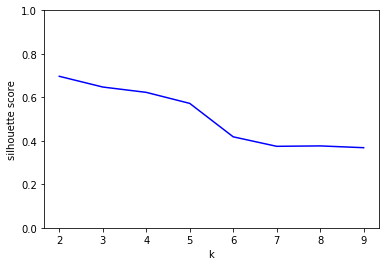

In [10]:
k_values = range(2, 10)
silhouette_values = []

## Do some initial runs to determine the right number for k

print '===== kmeans clustering ====='
for k in k_values:
    print 'k = ', k
    dataset_cluster = clusteringNH.k_means_over_instances(copy.deepcopy(dataset), ['acc_x', 'acc_y', 'acc_z'], k, 'default', 20, 10)
    silhouette_score = dataset_cluster['silhouette'].mean()
    print 'silhouette = ', silhouette_score
    silhouette_values.append(silhouette_score)

plot.plot(k_values, silhouette_values, 'b-')
plot.xlabel('k')
plot.ylabel('silhouette score')
plot.ylim([0,1])
plot.show()

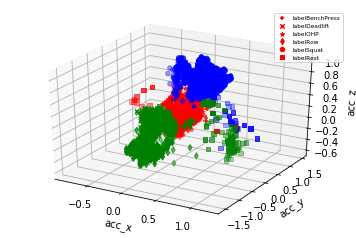

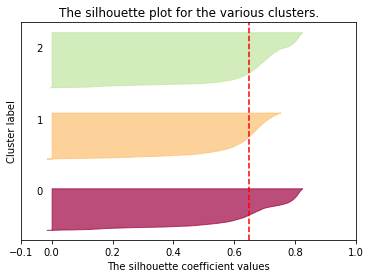

\multirow{2}{*}{ acc_x } & mean   &  -0.18  &  0.13  &  0.18 \\
 & std   &  0.13  &  0.22  &  0.19 \\
\multirow{2}{*}{ acc_y } & mean   &  0.93  &  -0.96  &  0.67 \\
 & std   &  0.16  &  0.28  &  0.16 \\
\multirow{2}{*}{ acc_z } & mean   &  -0.12  &  0.05  &  0.63 \\
 & std   &  0.15  &  0.20  &  0.19 \\
labelBenchPress  & percentage   &  99.90 \%  &  0.00 \%  &  0.10 \% \\
labelDeadlift  & percentage   &  0.00 \%  &  100.00 \%  &  0.00 \% \\
labelOHP  & percentage   &  99.17 \%  &  0.00 \%  &  0.83 \% \\
labelRow  & percentage   &  0.00 \%  &  100.00 \%  &  0.00 \% \\
labelSquat  & percentage   &  4.05 \%  &  0.00 \%  &  95.95 \% \\
labelRest  & percentage   &  3.52 \%  &  87.26 \%  &  9.21 \% \\


In [11]:
k = 3

dataset_knn = clusteringNH.k_means_over_instances(copy.deepcopy(dataset), ['acc_x', 'acc_y', 'acc_z'], k, 'default', 50, 50)
DataViz.plot_clusters_3d(dataset_knn, ['acc_x', 'acc_y', 'acc_z'], 'cluster', ['label'])
DataViz.plot_silhouette(dataset_knn, 'cluster', 'silhouette')
util.print_latex_statistics_clusters(dataset_knn, 'cluster', ['acc_x', 'acc_y', 'acc_z'], 'label')
del dataset_knn['silhouette']

## k medoids clustering

k_values = range(2, 10)
silhouette_values = []

# Do some initial runs to determine the right number for k

print '===== k medoids clustering ====='
for k in k_values:
    print 'k = ', k
    dataset_cluster = clusteringNH.k_medoids_over_instances(copy.deepcopy(dataset), ['gyr_x', 'acc_y', 'acc_z'], k, 'default', 20, n_inits=10)
    silhouette_score = dataset_cluster['silhouette'].mean()
    print 'silhouette = ', silhouette_score
    silhouette_values.append(silhouette_score)

plot.plot(k_values, silhouette_values, 'b-')
plot.ylim([0,1])
plot.xlabel('k')
plot.ylabel('silhouette score')
plot.show()

k = 3

dataset_kmed = clusteringNH.k_medoids_over_instances(copy.deepcopy(dataset), ['acc_x', 'acc_y', 'acc_z'], k, 'default', 20, n_inits=50)
DataViz.plot_clusters_3d(dataset_kmed, ['acc_x', 'acc_y', 'acc_z'], 'cluster', ['label'])
DataViz.plot_silhouette(dataset_kmed, 'cluster', 'silhouette')
util.print_latex_statistics_clusters(dataset_kmed, 'cluster', ['acc_x', 'acc_y', 'acc_z'], 'label')

## agglomaritive clustering

clusteringH = HierarchicalClustering()

k_values = range(2, 10)
silhouette_values = []

# Do some initial runs to determine the right number for the maximum number of clusters.

print '===== agglomaritive clustering ====='
for k in k_values:
    print 'k = ', k
    dataset_cluster, l = clusteringH.agglomerative_over_instances(copy.deepcopy(dataset), ['acc_x', 'acc_y', 'acc_z'], k, 'euclidean', use_prev_linkage=True, link_function='ward')
    silhouette_score = dataset_cluster['silhouette'].mean()
    print 'silhouette = ', silhouette_score
    silhouette_values.append(silhouette_score)
    if k == k_values[0]:
        DataViz.plot_dendrogram(dataset_cluster, l)

plot.plot(k_values, silhouette_values, 'b-')
plot.ylim([0,1])
plot.xlabel('max number of clusters')
plot.ylabel('silhouette score')
plot.show()

In [12]:
dataset_knn.to_csv(dataset_path + 'chapter5_result.csv')